<a href="https://colab.research.google.com/github/Knerdy-got-moves/Reproduction-of-the-paper-SDE-in-QSHI-based-JJ/blob/main/Codes_and_links_to_theory_on_SDE_in_QSHI_based_JJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the Josephson current without taking parity of the ground state constraint

## Hamiltonian for the system

For the full discussion of the Hamiltonian see Sec. 1 and 2 in my notes [here](https://drive.google.com/file/d/1adUVw_I1HKJGArPFP1t85OG_6cOn-JXT/view?usp=sharing).

We study the Bogoliubov-de Gennes (BdG) Hamiltonian for a Superconductor-Quantum Spin Hall Insulator-Superconductor (S--QSHI--S) junction. The Hamiltonian is given for spin $s = \uparrow, \downarrow$ and edge $\sigma = t$ (top), $b$ (bottom) as:

$$
\hat{H}_{s,\sigma} = (s \sigma v_F \hat{p}_x - \mu_S)\tau_z + s\frac{v_F p_S}{2} + V_0 h(x)\tau_z + \Delta(x)\left[\tau_x \cos \phi_\sigma(x) - \tau_y \sin \phi_\sigma(x)\right]
$$

Where:

1. $v_F$: Fermi velocity
2. $\hat{p}_x$: momentum operator
3. $\mu_S$: chemical potential
4. $V_0 h(x)$: scalar potential profile
5. $p_S = \pi \hbar \dfrac{B W_S}{\phi_\sigma}$: Doppler shift momentum from orbital magnetic field $B$ and width $W_S$
6. $\tau_{x,y,z}$: Pauli matrices in Nambu (particle-hole) space
7. $\phi_\sigma(x)$: superconducting phase at edge $\sigma$

where, these are represented in the BdG Nambu Spinor basis.
We define the Nambu spinor:

$$
\Psi(x) = \begin{pmatrix}
\psi_{\uparrow, t}(x) \\
\psi_{\downarrow, b}(x) \\
\psi^\dagger_{\downarrow, b}(x) \\
\psi^\dagger_{\uparrow, t}(x)
\end{pmatrix}
$$

BdG Hamiltonian Matrix

In this basis, the BdG Hamiltonian becomes a $4 \times 4$ matrix:

$$
\hat{H}_{\text{BdG}}(x) =
\begin{pmatrix}
v_F \hat{p}_x - \mu_S + \frac{v_F p_S}{2} + V_0 h(x) & 0 & 0 & \Delta(x) e^{i\phi_{\uparrow,t}(x)} \\
0 & -v_F \hat{p}_x - \mu_S - \frac{v_F p_S}{2} + V_0 h(x) & \Delta(x) e^{i\phi_{\downarrow,b}(x)} & 0 \\
0 & \Delta(x) e^{i\phi_{\downarrow,b}(x)} & -v_F \hat{p}_x + \mu_S - \frac{v_F p_S}{2} - V_0 h(x) & 0 \\
\Delta(x) e^{i\phi_{\uparrow,t}(x)} & 0 & 0 & v_F \hat{p}_x + \mu_S + \frac{v_F p_S}{2} - V_0 h(x)
\end{pmatrix}
$$

This Hamiltonian captures:

1. Helical edge modes with spin-momentum locking ($s \sigma v_F \hat{p}_x$ term)
2. Doppler shift ($\frac{v_F p_S}{2}$) from the orbital magnetic effect
3. Proximity-induced superconductivity via $\Delta(x) e^{\pm i \phi_\sigma(x)}$
4. Edge-dependent phases $\phi_{s,t(x)}$ and $\phi_{s,b}(x)$


## Andreev bound states

For the discussion of the choice for the ansatz wavefunction, see Sec. 3. in my notes [here](https://drive.google.com/file/d/1adUVw_I1HKJGArPFP1t85OG_6cOn-JXT/view?usp=sharing).


$$
\epsilon_s^\sigma (\phi^\sigma) = s \left[-\sigma \Delta \cos \frac{\phi^\sigma}{2} \, \text{sgn} \left(\sin \frac{\phi^\sigma}{2}\right) + \frac{v_F p_S}{2}\right]
$$

We define the dimensionless parameter:

$$
\gamma = \frac{v_F p_S}{2\Delta}
$$

and express energy in units of $\Delta$, so that the plotted expression becomes:

$$
\frac{\epsilon_s^\sigma (\phi^\sigma)}{\Delta} = s \left[-\sigma \cos \frac{\phi^\sigma}{2} \, \text{sgn} \left(\sin \frac{\phi^\sigma}{2}\right) + \gamma \right]
$$


- Subplots for the three gamma values: 0, 0.25, and 1.25
- Solid lines for subgap ABS
- Dashed lines for extended continuum parts
- Hatched shaded regions for continuum states (above $|\varepsilon| > \Delta$)


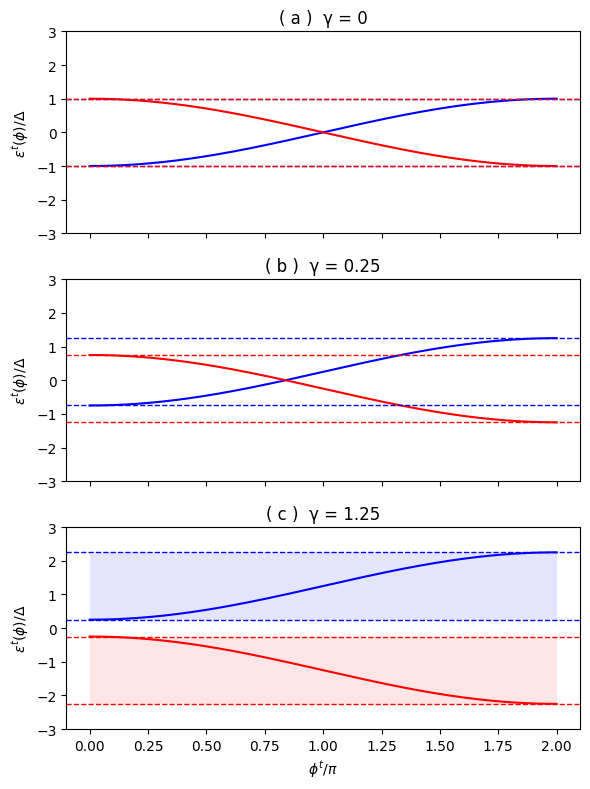

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define phi values
phi = np.linspace(0, 2*np.pi, 400)

# Parameters
gamma_values = [0, 0.25, 1.25]
colors = {+1: 'blue', -1: 'red'}  # s = +1 (blue), s = -1 (red)

# Setup subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

for i, gamma in enumerate(gamma_values):
    ax = axes[i]
    sigma = +1  # only top edge

    energy_dict = {}

    for s in [+1, -1]:  # band index
        cos_term = np.cos(phi / 2)
        eps = s * (-sigma * cos_term + gamma)

        # Store for later min/max
        energy_dict[s] = eps
        ax.plot(phi/np.pi, eps, color=colors[s], linestyle='-')

    # Extract upper/lower bounds
    blue_eps = energy_dict[+1]
    red_eps = energy_dict[-1]
    blue_min = np.min(blue_eps)
    blue_max = np.max(blue_eps)
    red_min = np.min(red_eps)
    red_max = np.max(red_eps)

    # Draw dashed lines at extrema
    ax.axhline(blue_max, color='blue', linestyle='--', linewidth=1)
    ax.axhline(blue_min, color='blue', linestyle='--', linewidth=1)
    ax.axhline(red_max, color='red', linestyle='--', linewidth=1)
    ax.axhline(red_min, color='red', linestyle='--', linewidth=1)

    # Shading between bands
    if gamma == 1.25:
        ax.fill_between(phi/np.pi, red_min, red_max,
                        facecolor='red', alpha=0.1)
        ax.fill_between(phi/np.pi, blue_min, blue_max,
                        facecolor='blue', alpha=0.1)

    # Labels
    ax.set_ylim(-3, 3)
    ax.set_ylabel(r"$\varepsilon^t(\phi)/\Delta$")
    ax.set_title(f"( {chr(97+i)} )  γ = {gamma}")

axes[-1].set_xlabel(r"$\phi^t/\pi$")
plt.tight_layout()
plt.show()



## Density of states

For the full discussion of the wavefunction ansatz choice for continuum density of states, please see Sec. 5.2.2, page 17 in my notes with detailed derivation [here](https://drive.google.com/file/d/1adUVw_I1HKJGArPFP1t85OG_6cOn-JXT/view?usp=drive_link).

By applying the boundary conditions:

1. $ \psi_{s,\sigma}(0^+) = e^{-is\sigma Z_0} \psi_{s,\sigma}(0^-) $  
2. $ \psi_{s,\sigma}(L_N^+) = e^{-is\sigma Z_0} \psi_{s,\sigma}(L_N^-) $
3. $\arccos(\epsilon_s / \Delta) = -s \sigma \frac{\phi_\sigma}{2} + \pi n $

to the piecewise-defined wavefunction, we find the reflection and transmission amplitudes.

We find the reflection and transmission amplitudes as:
$$
r_{eh}^{s,\sigma} = \frac{u_s v_s \left(e^{i\varphi_\sigma} - e^{2i L_N k_\epsilon} \right)}{-u_s^2 e^{i\varphi_\sigma} + v_s^2 e^{2i L_N k_\epsilon}}
$$
and,
$$
t_{ee}^{s,\sigma} = \frac{(u_s^2 - v_s^2) \, e^{-i\left[L_N(k_F - k_N - k_\epsilon + q_\epsilon) + 2Z_0 s\sigma - \varphi_\sigma\right]}}{u_s^2 e^{i\varphi_\sigma} - v_s^2 e^{2i L_N k_\epsilon}}.
$$
The scattering matrix is given by:
$$
S_{\mathrm{SNS}}=\left(\begin{array}{cc}
S_{\mathrm{SNS}}^{t} & 0 \\
0 & S_{\mathrm{SNS}}^{b}
\end{array}\right)
$$
with
$$
S_{\mathrm{SNS}}^{t}=\left(\begin{array}{cccc}
t_{e e}^{\uparrow, t} & 0 & 0 & r_{h e}^{\uparrow, t}  \\
0 & t_{h h}^{\downarrow, t} & r_{e h}^{\downarrow, t} & 0 \\
0 & r_{h e}^{\downarrow, t} & t_{e e}^{\downarrow, t} & 0 \\
r_{e h}^{\uparrow, t} & 0 & 0 & t_{h h}^{\uparrow, t}
\end{array}\right)
$$
and
$$
S_{\mathrm{SNS}}^{b}=\left(\begin{array}{cccc}
t_{e e}^{\downarrow, b} & 0 & 0 & r_{h e}^{\downarrow, b}  \\
0 & t_{h h}^{\uparrow, b} & r_{e h}^{\uparrow, b} & 0 \\
0 & r_{h e}^{\uparrow, b} & t_{e e}^{\uparrow, b} & 0 \\
r_{e h}^{\downarrow, b} & 0 & 0 & t_{h h}^{\downarrow, b}
\end{array}\right) .
$$




Subsituting the reflection and transmission coefficients and calculating the determinant,
$$
\det S_{\text{SNS}}^t = \prod_{s = \uparrow, \downarrow}
\frac{
\epsilon_s^2 - \Delta^2 \cos^2(\phi_t/2)
}{
\epsilon_s^2 \cos\phi_t - \Delta^2 \cos^2(\phi_t/2) + i s \epsilon_s \sqrt{\epsilon_s^2 - \Delta^2} \sin \phi_t
}
$$

The phase dependent part of the density of states (DOS) $ \rho_s^\sigma(\epsilon, \phi) $ due to the continuum is obtained via the Friedel relation:

$$
\rho_s^\sigma(\epsilon, \phi^\sigma) = \frac{1}{2\pi i} \frac{\partial}{\partial \epsilon} \ln \det S_{\text{SNS}}^\sigma
$$

this simplifies to:
$$\rho_s^\sigma (\epsilon, \phi^\sigma) = \frac{s \sigma \Delta^2}{2\pi} \frac{\Theta(\epsilon_s^2 - \Delta^2) \text{sgn}(\epsilon_s) \sin \phi^\sigma}{\sqrt{\epsilon_s^2 - \Delta^2(\epsilon_s^2 - \Delta^2 \cos^2 \frac{\phi^\sigma}{2})}}$$


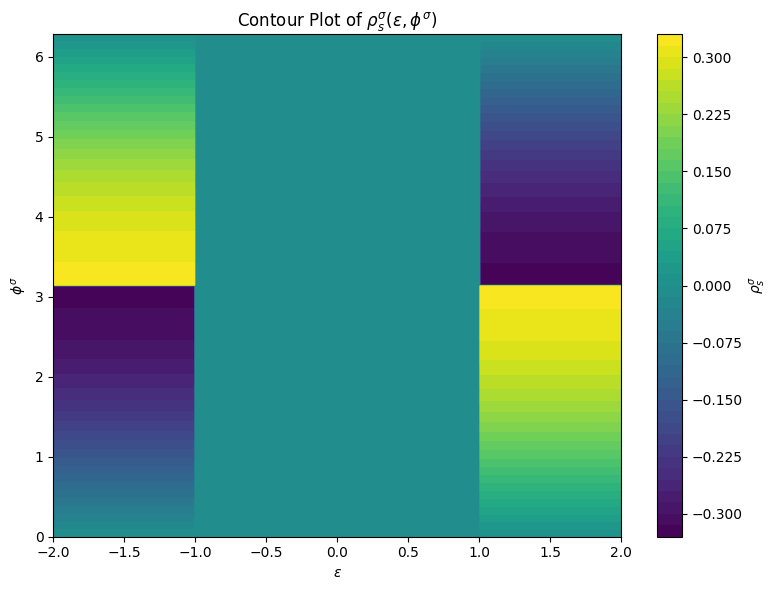

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Delta = 1.0  # Superconducting gap (in energy units)
s = 1        # spin quantum number, choose s = +1
sigma = 1    # edge label, choose σ = +1

# Define Theta function: returns 1 if x>=0, 0 otherwise.
def Theta(x):
    return np.heaviside(x, 0)

# Define domain
# Choose epsilon values such that |epsilon| covers values below and above Delta.
epsilon_vals = np.linspace(-2*Delta, 2*Delta, 400)
# Phase φ^σ from 0 to 2π
phi_vals = np.linspace(0, 2*np.pi, 400)
Epsilon, Phi = np.meshgrid(epsilon_vals, phi_vals)

# For this example, we set ε_s = ε.
# Compute the Theta term: only nonzero if epsilon^2 - Delta^2 >= 0.
theta_term = Theta(Epsilon**2 - Delta**2)

# Compute sgn(epsilon)
sign_term = np.sign(Epsilon)

# Compute the denominator argument:
# Denom_arg = ε² - Δ²(ε² - Δ² cos²(ϕ/2))
denom_arg = Epsilon**2 - Delta**2 * (Epsilon**2 - Delta**2 * np.cos(Phi/2)**2)

# Avoid taking square root of negative numbers: set negative arguments to NaN.
denom = np.sqrt(np.where(denom_arg < 0, np.nan, denom_arg))

# Now compute the density of states:
# With s = σ = 1, the prefactor is Δ²/(2π)
rho = (Delta**2 / (2 * np.pi)) * theta_term * sign_term * np.sin(Phi) / denom

# Create the contour plot
plt.figure(figsize=(8, 6))
contour_levels = 50  # Number of contour levels
cp = plt.contourf(Epsilon, Phi, rho, levels=contour_levels, cmap="viridis")
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\phi^\sigma$")
plt.title(r"Contour Plot of $\rho_s^\sigma(\epsilon,\phi^\sigma)$")
cbar = plt.colorbar(cp)
cbar.set_label(r"$\rho_s^\sigma$")
plt.tight_layout()
plt.show()


## Josephsons current



We can get the continuum contribution of the free energy from the density of states as:
$$
F^{\sigma}_{\text{bulk}} = -k_BT \int_0^\infty d\epsilon \, \rho^{\sigma}(\epsilon, \phi^{\sigma}) \ln \left[ 2 \cosh \left( \frac{\epsilon}{2k_BT} \right) \right].
$$
The ABS contribution to the free energy is given by:

$$
F_{\text{edge}} = -k_BT \ln \left[ 2 \cosh \left( \frac{\epsilon_{\uparrow}^{\sigma}(\phi^{\sigma})}{2k_BT} \right) \right].
$$
Combining them,
$$
F^{\sigma}(\phi^{\sigma}, T)= -k_BT \left(\int_0^\infty d\epsilon \, \rho^{\sigma}(\epsilon, \phi^{\sigma}) \ln \left[ 2 \cosh \left( \frac{\epsilon}{2k_BT} \right) \right] + \ln \left[ 2 \cosh \left( \frac{\epsilon_{\uparrow}^{\sigma}(\phi^{\sigma})}{2k_BT} \right) \right]\right)
$$
See Sec. 1 in my notes, [here](https://drive.google.com/file/d/1dUjncuwYQaxy_HZdFwm3IGfjFR0Amtd5/view?usp=sharing).


The Josephson current is given by:
$$
I = \frac{2e}{\hbar} \frac{\partial F}{\partial \phi}.
$$
Substituting the free energy contribution from both the Free energy and continuum desnity of states:
$$
I^\sigma(\phi^σ, T) = I^σ_{ABS}(\phi^σ, T) + I^σ_{cont}(\phi^σ, T).
$$
Introducing the short-hand notations,  
$$
I_0 = eΔ / 2ħ,  γ = v_F p_S / 2Δ,  \bar{Δ} = Δ / (2k_B T),
$$
the current contributions read,  
$$
I^σ_{ABS}(φ^σ, T) = I_0 sin(\phi^σ / 2) tanh [ \bar{Δ} ( cos(\phi^σ / 2) - σγ sgn( sin(\phi^σ / 2) ) ) ] (11)  
$$
and
$$
I^σ_{cont}(\phi^σ, T) = -I_0 \frac{σ} {\bar{Δ}} (\frac{1}{π}) ∫_0^∞ dx ~ln [\frac{ cosh( \bar{Δ}(x + y))} {cosh( \bar{Δ}(x - y))}] \frac{ ( x^2 cos(\phi^σ) - cos^2(\phi^σ / 2) ) }{ \sqrt{x^2 - 1}( x^2 - cos^2(\phi^σ / 2) )^2}.
$$

Computing currents:   1%|          | 1/100 [00:00<00:09,  9.90it/s]<ipython-input-2-4beb98cbf4e8>:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 1.0, 10.0, args=(phi, gamma, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)
Computing currents: 100%|██████████| 100/100 [00:31<00:00,  3.15it/s]


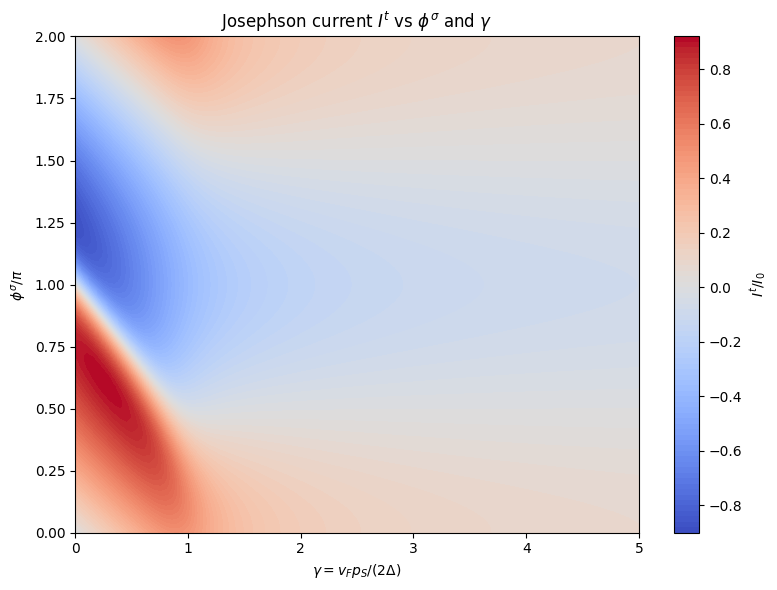

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from tqdm import tqdm  # shows progress bar for long loops

# Constants
I0 = 1
Delta_tilde = 5
sigma = 1  # top edge

# ABS current
def I_abs(phi, gamma):
    phi_half = phi / 2
    sign_sin = np.sign(np.sin(phi_half))
    term = Delta_tilde * (np.cos(phi_half) - sigma * gamma * sign_sin)
    return I0 * np.sin(phi_half) * np.tanh(term)

# Continuum integrand
def integrand(x, phi, gamma, cos_phi, cos_half_phi_sq):
    numerator = x**2 * cos_phi - cos_half_phi_sq
    denominator = np.sqrt(x**2 - 1) * (x**2 - cos_half_phi_sq)**2
    log_term = np.log(np.cosh(Delta_tilde * (x + gamma)) / np.cosh(Delta_tilde * (x - gamma)))
    return log_term * numerator / denominator

# Continuum current with upper limit 10
def I_cont(phi, gamma):
    cos_phi = np.cos(phi)
    cos_half_phi_sq = np.cos(phi / 2)**2
    result, _ = quad(integrand, 1.0, 10.0, args=(phi, gamma, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)
    return -I0 * sigma / Delta_tilde * (1/np.pi) * result

# Total current
def I_total(phi, gamma):
    return I_abs(phi, gamma) + I_cont(phi, gamma)

# Discretize phi and gamma (lower resolution for speed)
phi_vals = np.linspace(0, 2*np.pi, 100)
gamma_vals = np.linspace(0, 5, 100)

# Initialize result array
I_t_vals = np.zeros((len(gamma_vals), len(phi_vals)))

# Evaluate with progress bar
for i, gamma in enumerate(tqdm(gamma_vals, desc="Computing currents")):
    for j, phi in enumerate(phi_vals):
        I_t_vals[i, j] = I_total(phi, gamma)

# Plot
plt.figure(figsize=(8, 6))
Phi, Gamma = np.meshgrid(phi_vals, gamma_vals)
contour = plt.contourf(Gamma, Phi/np.pi, I_t_vals, levels=100, cmap="coolwarm")
cbar = plt.colorbar(contour, label=r"$I^t / I_0$")
plt.xlabel(r"$\gamma = v_F p_S / (2\Delta)$")
plt.ylabel(r"$\phi^{\sigma} / \pi$")
plt.title(r"Josephson current $I^t$ vs $\phi^{\sigma}$ and $\gamma$")
plt.tight_layout()
plt.show()


### Plot of maximal and minimal currents:

Finding extrema:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-3-26cb8451f94f>:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 1.0, 10.0, args=(phi, gamma, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)
Finding extrema: 100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


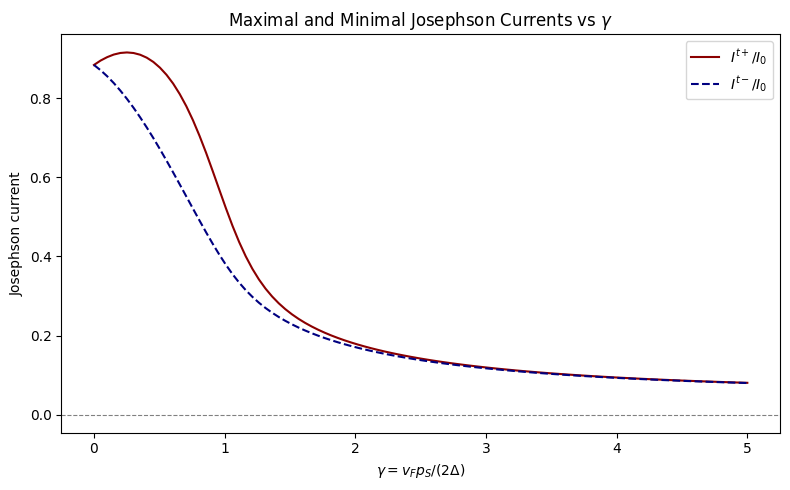

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from tqdm import tqdm

# Constants
I0 = 1
Delta_tilde = 5
sigma = 1  # top edge

# ABS current
def I_abs(phi, gamma):
    phi_half = phi / 2
    sign_sin = np.sign(np.sin(phi_half))
    term = Delta_tilde * (np.cos(phi_half) - sigma * gamma * sign_sin)
    return I0 * np.sin(phi_half) * np.tanh(term)

# Continuum integrand
def integrand(x, phi, gamma, cos_phi, cos_half_phi_sq):
    numerator = x**2 * cos_phi - cos_half_phi_sq
    denominator = np.sqrt(x**2 - 1) * (x**2 - cos_half_phi_sq)**2
    log_term = np.log(np.cosh(Delta_tilde * (x + gamma)) / np.cosh(Delta_tilde * (x - gamma)))
    return log_term * numerator / denominator

# Continuum current
def I_cont(phi, gamma):
    cos_phi = np.cos(phi)
    cos_half_phi_sq = np.cos(phi / 2)**2
    result, _ = quad(integrand, 1.0, 10.0, args=(phi, gamma, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)
    return -I0 * sigma / Delta_tilde * (1/np.pi) * result

# Total current
def I_total(phi, gamma):
    return I_abs(phi, gamma) + I_cont(phi, gamma)

# Discretized phi and gamma
phi_vals = np.linspace(0, 2*np.pi, 200)
gamma_vals = np.linspace(0, 5, 100)

# Store max and min currents
I_t_max = []
I_t_min = []

# Loop through gamma and find max/min over phi
for gamma in tqdm(gamma_vals, desc="Finding extrema"):
    I_vals = [I_total(phi, gamma) for phi in phi_vals]
    I_t_max.append(np.max(I_vals))
    I_t_min.append(np.abs(np.min(I_vals)))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(gamma_vals, I_t_max, label=r"$I^{t+} / I_0$", color='darkred')
plt.plot(gamma_vals, I_t_min, label=r"$I^{t-} / I_0$", color='navy',  linestyle='--')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel(r"$\gamma = v_F p_S / (2\Delta)$")
plt.ylabel(r"Josephson current")
plt.title(r"Maximal and Minimal Josephson Currents vs $\gamma$")
plt.legend()
plt.tight_layout()
plt.show()


### Quality factor



$$ Q^\alpha (y, T) = \frac{|I^{\sigma+}| - |I^{\sigma-}|}{I_0}. $$
where,
1. $I^{\sigma+}$ is the maximal current for edge $\sigma$,
2. $I^{\sigma-}$ is the minimal current for edge $\sigma$.



Δ̃ = 10:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-4-eb3b83134c9d>:49: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 1.0, 20.0, args=(phi, gamma, Delta_tilde, cos_phi, cos_half_phi_sq),limit=50, epsabs=1e-3)
Δ̃ = 5:  55%|█████▌    | 55/100 [00:26<00:21,  2.10it/s]<ipython-input-4-eb3b83134c9d>:30: RuntimeWarning: divide by zero encountered in scalar divide
  return log_term * numerator / denominator
<ipython-input-4-eb3b83134c9d>:49: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 1

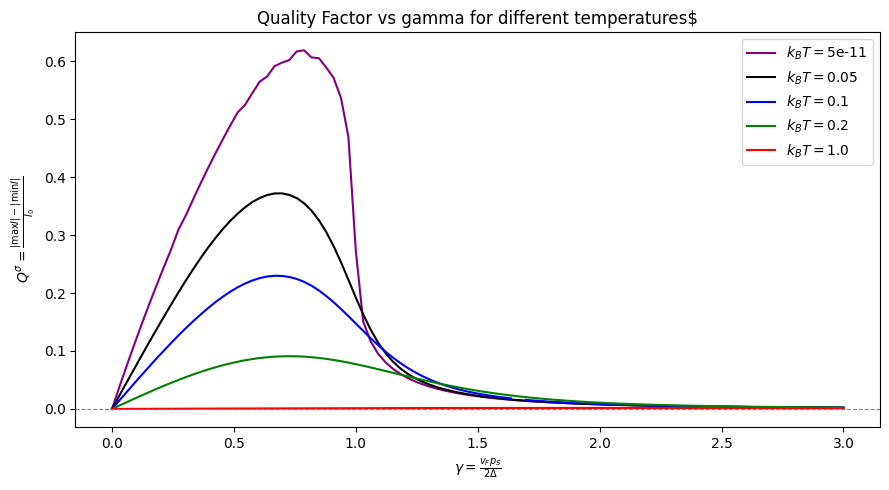

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from tqdm import tqdm

# Constants
I0 = 1
sigma = 1  # top edge

# Set of Delta/T values
Delta_tilde_vals = [1e10, 10, 5, 2.5, 0.5]

# Grid
phi_vals = np.linspace(0, 2 * np.pi, 200)
gamma_vals = np.linspace(0, 3, 100)

# ABS current
def I_abs(phi, gamma, Delta_tilde):
    phi_half = phi / 2
    term = Delta_tilde * (np.cos(phi_half) - sigma * gamma)
    return I0 * np.sin(phi_half) * np.tanh(term)

# Continuum integrand
def integrand(x, phi, gamma, Delta_tilde, cos_phi, cos_half_phi_sq):
   if Delta_tilde == 0:
        return 0.0
   numerator = x**2 * cos_phi - cos_half_phi_sq
   denominator = np.sqrt(x**2 - 1) * (x**2 - cos_half_phi_sq)**2
   log_term = np.log(np.cosh(Delta_tilde * (x + gamma)) / np.cosh(Delta_tilde * (x - gamma)))
   return log_term * numerator / denominator

# Continuum current
def I_conto(phi, gamma, Delta_tilde):
        phi_half = phi / 2
        sin_phi_half = np.sin(phi_half)
        gamma_term = sigma * (2 * I0 / np.pi) * gamma
        if gamma < 1:
            return gamma_term
        else:
            root_term = np.sqrt(gamma**2 - 1)
            atan_arg = root_term / sin_phi_half if sin_phi_half != 0 else np.inf
            extra = (np.arctan(atan_arg) * sin_phi_half - root_term)
            return gamma_term + sigma * (2 * I0 / np.pi) * extra
def I_contT(phi, gamma, Delta_tilde):
    if Delta_tilde == 0:
        return 0.0
    cos_phi = np.cos(phi)
    cos_half_phi_sq = np.cos(phi / 2)**2
    result, _ = quad(integrand, 1.0, 20.0, args=(phi, gamma, Delta_tilde, cos_phi, cos_half_phi_sq),limit=50, epsabs=1e-3)
    return -I0 * sigma / Delta_tilde * (1 / np.pi) * result
# Total current
def I_total(phi, gamma, Delta_tilde):
  if Delta_tilde > 1e5:
    return I_abs(phi, gamma, Delta_tilde) + I_conto(phi, gamma, Delta_tilde)
  else:
    return I_abs(phi, gamma, Delta_tilde) + I_contT(phi, gamma, Delta_tilde)

# Dictionary to store quality factors for each Delta_tilde
Q_dict = {}

# Loop over each Delta_tilde
for Delta_tilde in Delta_tilde_vals:
    Q_vals = []
    for gamma in tqdm(gamma_vals, desc=f"Δ̃ = {Delta_tilde}"):
        I_vals = [I_total(phi, gamma, Delta_tilde) for phi in phi_vals]
        I_plus = np.max(I_vals)
        I_minus = np.min(I_vals)
        Q = abs(abs(I_plus) - abs(I_minus)) / I0
        Q_vals.append(Q)
    Q_dict[Delta_tilde] = Q_vals

# Plotting
plt.figure(figsize=(9, 5))
colors = ['purple', 'black', 'blue', 'green', 'red']
for i, Delta_tilde in enumerate(Delta_tilde_vals):
    label = r"$k_B T = $" + f"{1/(2*Delta_tilde)}"
    plt.plot(gamma_vals, Q_dict[Delta_tilde], label=label, color=colors[i])

plt.xlabel(r"$\gamma = \frac{v_F p_S}{2\Delta}$")
plt.ylabel(r"$Q^{\sigma} = \frac{|\max I| - |\min I|}{I_0}$")
plt.title("Quality Factor vs gamma for different temperatures$")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

Note the graph has a little imperfection as compared to the one in the paper. I attribute these imperfection to the numerical errors coming from a less dense set of points for the x axis, which makes the graph for $k_B T=0$ a bit rought near the maxima. However a more dense set would increase the computation for the other temperatures.

# Finding the Josephson current taking parity of the ground state constraint

## Free energy



If the fermion parity $$p = \pm1$$ is conserved at a given edge $$\sigma = t/b,$$

an additional term in the density of states appears given by

 $$ \rho_{p}(\epsilon_{s}) = \frac{2}{\pi E_{S}} \sum_{s=\uparrow / \downarrow} \frac{|\epsilon_{s}|\Theta(\epsilon_{s}^{2} - \Delta^{2})}{\sqrt{\epsilon_{s}^{2} - \Delta^{2}}}, $$

 $$= \frac{2}{\pi E_{S}} \sum_{s=\uparrow / \downarrow} \frac{|\epsilon_{s}|\Theta(\epsilon_{s}^{2} - \Delta^{2})}{\sqrt{\epsilon_{s}^{2} - \Delta^{2}}}, $$

where $E_S =  ħ v_F /L_S$, we define,
$$\rho_{tot}^{\sigma}=\sum_{s=\uparrow, \downarrow}\rho_s^\sigma (\epsilon_{s}, \phi^\sigma)+ \rho_{p}(\epsilon_{s}),$$
where,
$$\rho_s^\sigma (\epsilon, \phi^\sigma) = \frac{s \sigma \Delta^2}{2\pi} \frac{\Theta(\epsilon_s^2 - \Delta^2) \text{sgn}(\epsilon_s) \sin \phi^\sigma}{\sqrt{\epsilon_s^2 - \Delta^2}(\epsilon_s^2 - \Delta^2 \cos^2 \frac{\phi^\sigma}{2})}$$
These can be written in terms of dimensionless parameters:
$$\rho_{tot}^{\sigma}=\sum_{s=\uparrow, \downarrow}\left[\frac{s \sigma}{2\pi\Delta} \frac{\Theta(x- 1) \text{sgn}(x) \sin \phi^\sigma}{\sqrt{x^2 - 1}(x- \cos^2 \frac{\phi^\sigma}{2})}+ \frac{2}{\pi E_{S}} \sum_{s=\uparrow / \downarrow} \frac{|x|\Theta(x^{2} - 1)}{\sqrt{x^{2} - 1}}\right],$$
where,
$$
x=\frac{\epsilon_s^\sigma (\phi^\sigma)}{\Delta} = s \left[-\sigma \cos \frac{\phi^\sigma}{2} \, \text{sgn} \left(\sin \frac{\phi^\sigma}{2}\right) + \gamma \right].
$$





The free energy acquires an additional contribution due to
the parity constraint and is given by
$$F_{p}^{\sigma}(\phi^{\sigma}, T) =F^{\sigma}(\phi^{\sigma}, T)+ F_{Parity}^{\sigma}(\phi^{\sigma}, T)$$
$$=F^{\sigma}(\phi^{\sigma}, T) - k_BT \ln \left\{ \frac{1}{2}\left[1+pP_{\sigma}(\phi^{\sigma}) \tanh \left| \frac{\epsilon_{\uparrow}^{\sigma}(\phi^{\sigma})}{2k_BT} \right| \exp \left[ J_S(T) + \int_{0}^{\infty} d\epsilon \rho_{tot}^{\sigma}(\epsilon, \phi^{\sigma}) \ln \left[ \tanh \left( \frac{\epsilon}{2k_B T} \right) \right] \right] \right] \right\},$$

which means in terms of dimensionless quantities,

$$F_{Parity}^{\sigma}(\phi^{\sigma}, T)=- k_BT \ln \left\{ \frac{1}{2}\left[1+pP_{\sigma}(\phi^{\sigma}) \tanh \left|\bar{\Delta}x \right| \exp \left[ J_S(T) + \int_{0}^{\infty} d x' \rho_{tot}^{\sigma}(x', \phi^{\sigma}) \ln \left[ \tanh \left( \bar{\Delta} x'\right) \right] \right] \right] \right\}$$




Here $p = \pm 1$ and the function $P_{\sigma}(\phi^{\sigma})$ describes the ground-state fermion parity as $\phi^{\sigma}$ is tuned.
$$P_{\sigma}(\phi^{\sigma}) = \text{sgn} \left[ \cos \frac{\phi^{\sigma}}{2} - \sigma \gamma \text{sgn} \left( \sin \frac{\phi^{\sigma}}{2} \right) \right]$$

The phase independent density of states of the superconducting electrodes on top of the QSHI contribute with:

$$J_S(T) = -\frac{2}{\pi k_B T E_S} \int_{\Delta}^{\infty} d\epsilon \frac{\sqrt{\epsilon^2 - \Delta^2}}{\sinh{(\epsilon/k_B T)}}$$
or,
$$J_S(\bar{\Delta}) = -\frac{4 \bar{\Delta}}{\pi E_S} \int_{1}^{\infty} d x \frac{\sqrt{x^2 - 1}}{\sinh{(\bar{\Delta} x)}}$$
where, the S subscript stands for superconducting electrodes.

We want to calculate the current due to parity effect which is given by:
$$I^{\sigma} (\phi^{\sigma}, T) = \frac{2e}{\hbar} \frac{\partial F^{\sigma} (\phi^{\sigma}, T)}{\partial \phi^{\sigma}} = \frac{2e}{\hbar} \frac{\partial F^{\sigma} (\phi^{\sigma}, T)}{\partial \phi}$$


<ipython-input-3-5a54a07b6445>:76: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 1.0, 10.0, args=(phi, gamma, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)


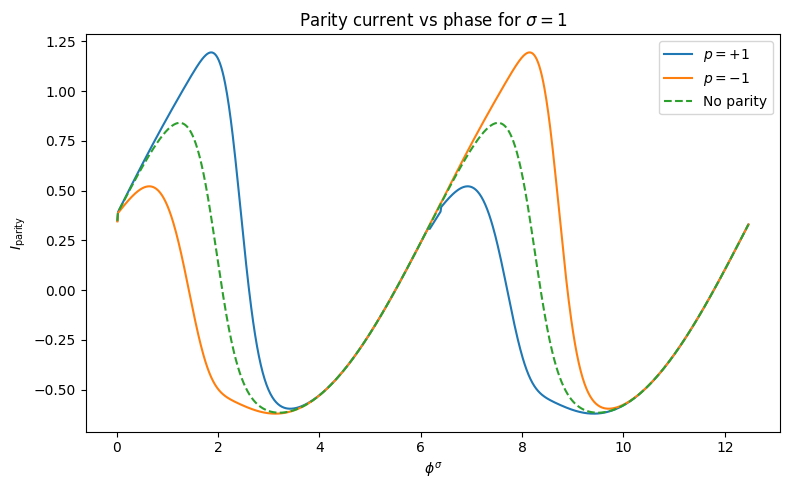

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
# Constants
bar_Delta = 5.0    # \bar{\Delta}
Delta = 1.0        # \Delta
Es = 0.05          # E_S
gamma = 0.6        # \gamma
sigma = 1         # \sigma
I0=1
# 1) Compute J_S(T)
def integrand_J(x, epsilon=1e-6):
    # Adding a small epsilon to avoid division by zero or overflow in sinh
    #return np.sqrt(x**2 - 1) / np.sinh(bar_Delta * x)
    numerator = np.sqrt(x**2 - 1 + epsilon)  # Added epsilon for stability
    denominator = np.sinh(bar_Delta * x)
    return numerator / denominator
J_S = -4 * bar_Delta / (np.pi * Es) * quad(integrand_J, 1, 20)[0]

# 2) Continuum contribution integral: \int_1^\infty dx \; \rho_{cont}(x) \ln[\tanh(bar_Delta x)]
def integrand_cont(x):
    return (2 / (np.pi * Es)) * np.abs(x) / np.sqrt(x**2 - 1) * np.log(np.tanh(bar_Delta * x))

cont_int = quad(integrand_cont, 1, np.inf)[0]

# 3) Parity function P_sigma(phi)
def P_sigma(phi):
    return smooth_sign(np.cos(phi / 2) - sigma * gamma * smooth_sign(np.sin(phi / 2)))

# 4) Andreev bound-state energy x for s=\pm 1
def x(s, phi):
    return s * (-sigma * np.cos(phi / 2) * smooth_sign(np.sin(phi / 2)) + gamma)

# 5) Define F_parity(phi, p)
def F_parity(phi, p):
    # bound-state contribution
    x_n = x(sigma, phi)
    bs_factor = p * P_sigma(phi) * np.tanh(np.abs(bar_Delta * x_n))
    # full exponent
    exponent = J_S + cont_int
    return -np.log(0.5 * (1 + bs_factor * np.exp(exponent)))
def smooth_sign(x, eps=1e-14):
    return np.tanh(x / eps)
nphis=1000
# 6) Generate phi grid and compute F for p=+1, -1\ nphis = 1000

phis = np.linspace(0, 4 * np.pi, nphis)
phis = phis[~np.isclose(phis, 0, atol=0.01)]
phis = phis[~np.isclose(phis, 2*np.pi, atol=0.1)]
phis = phis[~np.isclose(phis, 4*np.pi, atol=0.1)]
F_plus = np.array([F_parity(phi, +1) for phi in phis])
F_minus = np.array([F_parity(phi, -1) for phi in phis])

# 7) Numerical derivative dF/dphi = I_parity
I_parity_plus = np.gradient(F_plus, phis)/2
I_parity_minus = np.gradient(F_minus, phis)/2

# ABS current
def I_abs(phi, gamma):
    phi_half = phi / 2
    sign_sin = np.sign(np.sin(phi_half))
    term = bar_Delta * (np.cos(phi_half) - sigma * gamma * sign_sin)
    return I0 * np.sin(phi_half) * np.tanh(term)

# Continuum integrand
def integrand(x, phi, gamma, cos_phi, cos_half_phi_sq):
    numerator = x**2 * cos_phi - cos_half_phi_sq
    denominator = np.sqrt(x**2 - 1) * (x**2 - cos_half_phi_sq)**2
    log_term = np.log(np.cosh(bar_Delta * (x + gamma)) / np.cosh(bar_Delta * (x - gamma)))
    return log_term * numerator / denominator

# Continuum current with upper limit 10
def I_cont(phi, gamma):
    cos_phi = np.cos(phi)
    cos_half_phi_sq = np.cos(phi / 2)**2
    result, _ = quad(integrand, 1.0, 10.0, args=(phi, gamma, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)
    return -I0 * sigma / bar_Delta * (1/np.pi) * result


I_total_plus= np.array([I_abs(phi, gamma)for phi in phis]) + np.array([I_cont(phi, gamma)for phi in phis])+I_parity_plus
I_total_minus= np.array([I_abs(phi, gamma)for phi in phis]) + np.array([I_cont(phi, gamma) for phi in phis]) +I_parity_minus
I_total_noparity= np.array([I_abs(phi, gamma)for phi in phis]) + np.array([I_cont(phi, gamma) for phi in phis])
# 8) Plotting
plt.figure(figsize=(8, 5))
plt.plot(phis, I_total_plus, label=r'$p=+1$')
plt.plot(phis, I_total_minus, label=r'$p=-1$')
plt.plot(phis, I_total_noparity, label=r'No parity', linestyle='--')
plt.xlabel(r'$\phi^\sigma$')
plt.ylabel(r'$I_{\mathrm{parity}}$')
plt.title(r'Parity current vs phase for $\sigma=1$')
plt.legend()
plt.tight_layout()
plt.show()

## Quality factor

(under construction)

Δ̃ = 10000000000.0:   0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-22-7623956c5c20>:81: RuntimeWarning: overflow encountered in exp
  denominator = 0.5 * np.exp(arg)
<ipython-input-22-7623956c5c20>:111: RuntimeWarning: divide by zero encountered in log
  return -np.log(0.5 * (1 + bs_factor * np.exp(exponent)))
Δ̃ = 10:   1%|          | 1/100 [00:00<00:11,  8.35it/s]<ipython-input-22-7623956c5c20>:70: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res, _ = quad(integrand, 1.0, 20.0, args=(p, gamma, Delta_tilde, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)
Δ̃ = 10:  38%|███▊      | 38/100 [00:29<00:49,  1.26it/s]<ipython-input-22-7623956c5c20>:70: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  res, _ = quad(integrand, 1.0, 20.0

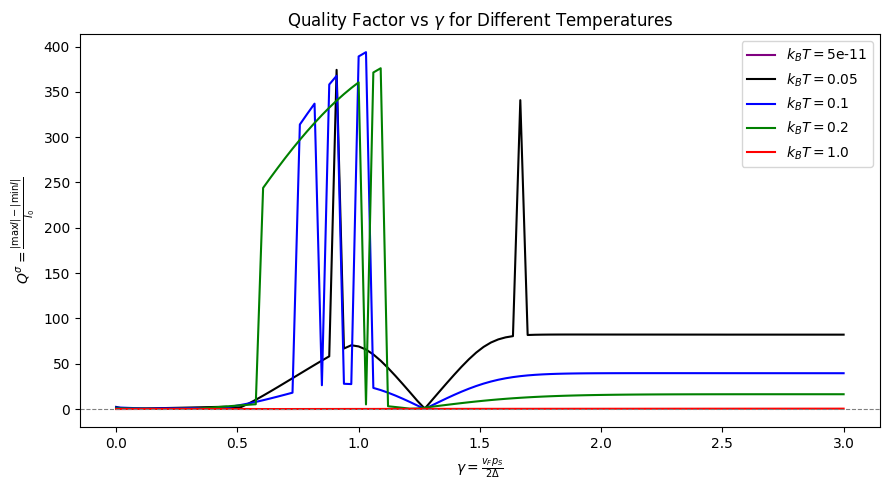

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from tqdm import tqdm

# Constants
I0 = 1
sigma = 1
Es = 1  # Define Es (adjust based on physical context)

# Set of Delta/T values
Delta_tilde_vals = [1e10, 10, 5, 2.5, 0.5]
phi_vals = np.linspace(0, 4 * np.pi, 200)
gamma_vals = np.linspace(0, 3, 100)

# ABS current (unchanged)
def I_abs(phi, gamma, Delta_tilde):
    phi_half = phi / 2
    term = Delta_tilde * (np.cos(phi_half) - sigma * gamma)
    return I0 * np.sin(phi_half) * np.tanh(term)

# Continuum integrand
def integrand(x, phi, gamma, Delta_tilde, cos_phi, cos_half_phi_sq, epsilon=1e-6):
    if Delta_tilde == 0:
        return 0.0
    numerator = x**2 * cos_phi - cos_half_phi_sq
    denominator = np.sqrt(x**2 - 1 + epsilon) * (x**2 - cos_half_phi_sq + epsilon)**2
    log_term = np.log(np.cosh(Delta_tilde * (x + gamma)) / np.cosh(Delta_tilde * (x - gamma)))
    return log_term * numerator / denominator

# Continuum current (fixed typo)
def I_conto(phi, gamma, Delta_tilde):
    phi = np.asarray(phi)
    phi_half = phi / 2
    sin_phi_half = np.sin(phi_half)
    gamma_term = sigma * (2 * I0 / np.pi) * gamma
    if np.isscalar(gamma):
        if gamma < 1:
            return gamma_term
        else:
            root_term = np.sqrt(gamma**2 - 1)
            atan_arg = root_term / sin_phi_half if np.all(sin_phi_half != 0) else np.inf
            extra = (np.arctan(atan_arg) * sin_phi_half - root_term)
            return gamma_term + sigma * (2 * I0 / np.pi) * extra
    else:
        result = np.zeros_like(phi, dtype=float)
        mask = gamma < 1
        result[mask] = gamma_term[mask]
        root_term = np.sqrt(gamma**2 - 1)
        atan_arg = np.where(sin_phi_half != 0, root_term / sin_phi_half, np.inf)
        extra = (np.arctan(atan_arg) * sin_phi_half - root_term)
        result[~mask] = gamma_term[~mask] + sigma * (2 * I0 / np.pi) * extra[~mask]
        return result

def I_contT(phi, gamma, Delta_tilde):
    if Delta_tilde == 0:
        return np.zeros_like(phi, dtype=float) if not np.isscalar(phi) else 0.0
    # Handle scalar and array cases
    if np.isscalar(phi):
        cos_phi = np.cos(phi)
        cos_half_phi_sq = np.cos(phi / 2)**2
        result, _ = quad(integrand, 1.0, 20.0, args=(phi, gamma, Delta_tilde, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)
        return -I0 * sigma / Delta_tilde * (1 / np.pi) * result
    else:
        # Compute for each phi value
        result = np.zeros_like(phi, dtype=float)
        for i, p in enumerate(phi):
            cos_phi = np.cos(p)
            cos_half_phi_sq = np.cos(p / 2)**2
            res, _ = quad(integrand, 1.0, 20.0, args=(p, gamma, Delta_tilde, cos_phi, cos_half_phi_sq), limit=50, epsabs=1e-3)
            result[i] = -I0 * sigma / Delta_tilde * (1 / np.pi) * res
        return result
def smooth_sign(x, eps=1e-14):
    return np.tanh(x / eps)

# J_S integrand (improved stability)
def integrand_J(x, Delta_tilde, epsilon=1e-6):
    numerator = np.sqrt(x**2 - 1 + epsilon)
    arg = Delta_tilde * x
    if arg > 100:
        denominator = 0.5 * np.exp(arg)
    else:
        denominator = np.sinh(arg)
    return numerator / denominator

def J_S(Delta_tilde):
    upper_limit = 20 if Delta_tilde > 1 else 100
    return -4 * Delta_tilde / (np.pi * Es) * quad(integrand_J, 1, upper_limit, args=(Delta_tilde), limit=50, epsabs=1e-3)[0]

# Continuum contribution (removed unused gamma)
def integrand_cont(x, Delta_tilde):
    return (2 / (np.pi * Es)) * np.abs(x) / np.sqrt(x**2 - 1) * np.log(np.tanh(Delta_tilde * x))

def cont_int(Delta_tilde):
    upper_limit = 1000 if Delta_tilde < 1 else 100
    return quad(integrand_cont, 1, upper_limit, args=(Delta_tilde), limit=50, epsabs=1e-3)[0]

# Parity function (unchanged)
def P_sigma(phi, gamma, Delta_tilde):
    return smooth_sign(np.cos(phi / 2) - sigma * gamma * smooth_sign(np.sin(phi / 2)))

# Andreev bound-state energy (unchanged)
def x(s, phi, gamma, Delta_tilde):
    return s * (-sigma * np.cos(phi / 2) * smooth_sign(np.sin(phi / 2)) + gamma)

# F_parity (updated for cont_int)
def F_parity(phi, p, gamma, Delta_tilde):
    x_n = x(sigma, phi, gamma, Delta_tilde)
    bs_factor = p * P_sigma(phi, gamma, Delta_tilde) * np.tanh(np.abs(Delta_tilde * x_n))
    exponent = J_S(Delta_tilde) + cont_int(Delta_tilde)
    return -np.log(0.5 * (1 + bs_factor * np.exp(exponent)))

# F_plus and I_parity_plus (fixed gradient)
def F_plus(phi, gamma, Delta_tilde):
    return F_parity(phi, +1, gamma, Delta_tilde)

def I_parity_plus(phi, gamma, Delta_tilde):
    F_vals = np.array([F_plus(p, gamma, Delta_tilde) for p in phi])
    dphi = phi[1] - phi[0] if len(phi) > 1 else 1.0
    return np.gradient(F_vals, dphi)

# Total current (vectorized)
def I_total(phi, gamma, Delta_tilde):
    if Delta_tilde > 1e5:
        return I_abs(phi, gamma, Delta_tilde) + I_conto(phi, gamma, Delta_tilde) + I_parity_plus(phi, gamma, Delta_tilde)
    else:
        return I_abs(phi, gamma, Delta_tilde) + I_contT(phi, gamma, Delta_tilde) + I_parity_plus(phi, gamma, Delta_tilde)

# Main computation loop
Q_dict = {}
for Delta_tilde in Delta_tilde_vals:
    Q_vals = []
    for gamma in tqdm(gamma_vals, desc=f"Δ̃ = {Delta_tilde}"):
        I_vals = I_total(phi_vals, gamma, Delta_tilde)
        I_plus = np.max(I_vals)
        I_minus = np.min(I_vals)
        Q = abs(abs(I_plus) - abs(I_minus)) / I0
        Q_vals.append(Q)
    Q_dict[Delta_tilde] = Q_vals

# Plotting
plt.figure(figsize=(9, 5))
colors = ['purple', 'black', 'blue', 'green', 'red']
for i, Delta_tilde in enumerate(Delta_tilde_vals):
    label = r"$k_B T = $" + f"{1/(2*Delta_tilde)}"
    plt.plot(gamma_vals, Q_dict[Delta_tilde], label=label, color=colors[i])

plt.xlabel(r"$\gamma = \frac{v_F p_S}{2\Delta}$")
plt.ylabel(r"$Q^{\sigma} = \frac{|\max I| - |\min I|}{I_0}$")
plt.title(r"Quality Factor vs $\gamma$ for Different Temperatures")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()